### 森田研究室  
### 33B21009 羽田充宏

## 知識情報学第11回演習サンプルプログラム ex11.ipynb
- Programmed by Wu Hongle, 監修　福井健一
- Last updated: 2016/11/18
- Checked with Python 3.6, scikit-learn 0.22, somoclu 1.7.5
- MIT Lisence

## SOM学習によるglassデータの可視化
- somocluのAPIリファレンスは下記を参照
 - https://somoclu.readthedocs.io/en/stable/
 - エラーが出る場合は1.7.4に落としてみると動くこともある（Windows）

### 【課題1】SOM学習結果をU-matrixおよびComponent Planesにより可視化しなさい．
-  ヒント：view_umatrix()およびview_component_planes()を使用する

### 【課題2】可視化結果からglassデータについて分析しなさい．
- クラス毎の特徴，クラス間の類似性に着目すると良い

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import somoclu

### glassデータの読み込み
- pandasのread_csvを利用

In [17]:
df_glass = pd.read_csv("glass.data", header=None)
df_glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
labels =  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = df_glass[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
X_std = np.float32(scale(X))
y = df_glass['Type'].values

n_feature = X.shape[1]
n_class = max(df_glass['Type'].values)

In [18]:
df_glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


ラベルの種類

In [19]:
set(y)

{1, 2, 3, 5, 6, 7}

データ数

In [20]:
len(df_glass)

214

### SOM学習

In [21]:
som = somoclu.Somoclu(n_rows=10, n_columns=15, initialization="pca",  gridtype='rectangular')
som.train(data=X_std, epochs=200)

### U-matrix表示

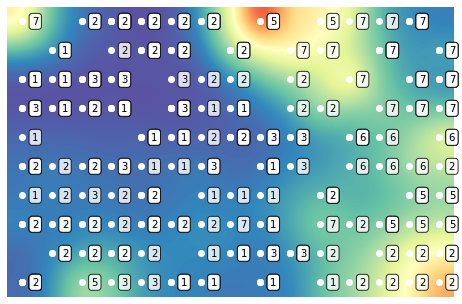

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [22]:
som.view_umatrix(bestmatches=True,labels = y)

### 各特徴量の分布（Component Planes）

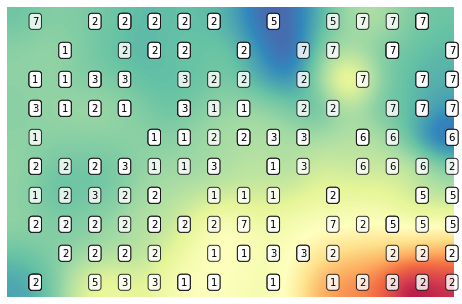

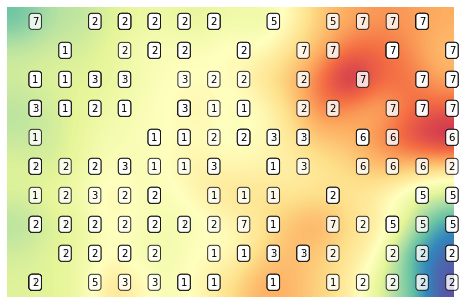

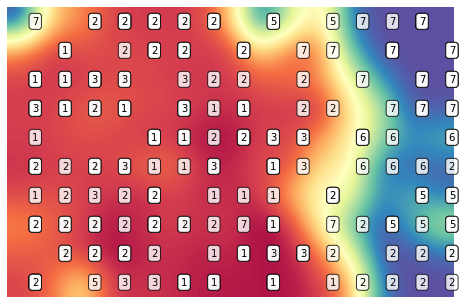

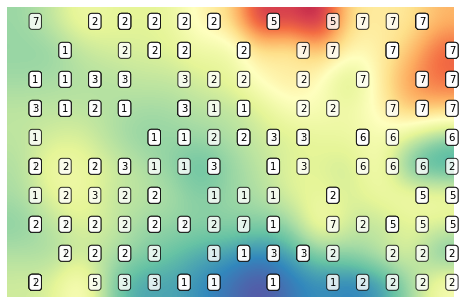

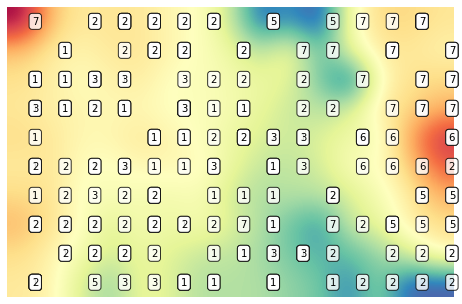

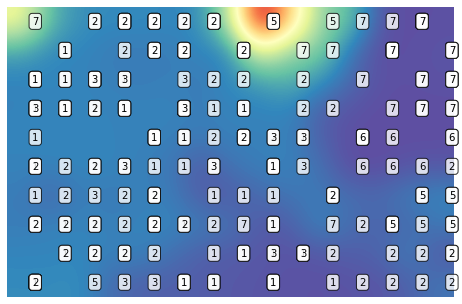

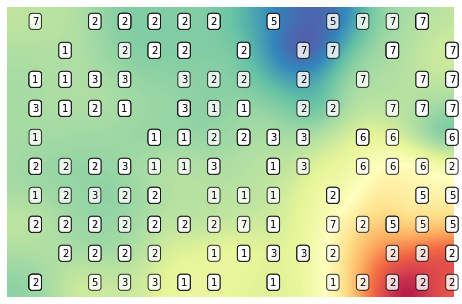

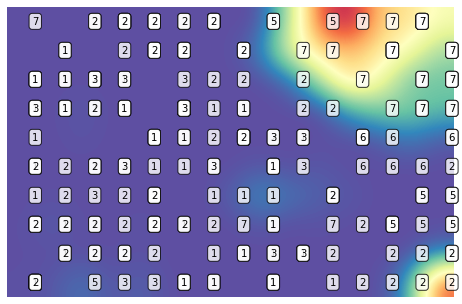

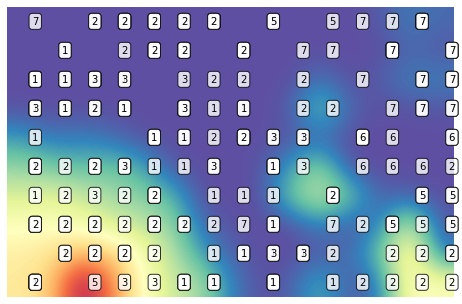

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [23]:
som.view_component_planes(labels = y)

まず今回は自己組織化マップによって
$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ f_k : \mathbb{R}^{2} → \mathbb{R}^{9}\ k=1,2,...,$$
$$z_k \mapsto y_k$$
の写像を学習したことになる．  
ここでU-matrix表示での色はそれぞれの点間の類似度のようなものを表しており，赤い色ほど他の点距離が遠いことを示している．  
またComponent planesではd番目特徴量に関して考えるときは，参照ベクトルのd番目の次元の値$y_{kd} \in \mathbb{R}$の大きさの大小によって色分けされている．  
U-matrixを見ると，大域的には左側に1,2のデータが分布し，右側に5,6,7のデータが分布しているので，これら二つのデータの性質が特に異なっているのことが推測できる．  
実際，ガラスの種類は以下のようになっている．
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 5 containers
- 6 tableware
- 7 headlamps  
よって1,2と5,6,7のガラスで建物用，それ以外という結果となっており，分析結果と整合していることがわかる．  
また，局所的なデータの特徴についてみると，左上の7や真ん中上の5，右下の2などの周辺が赤くなっており，これらのデータは他のデータと比べて特徴的なデータであることが推測できる．  


## 追加考察
以下ではPCAによって次元圧縮した結果を示す


In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)
y_pred = pca.fit_transform(X_std)

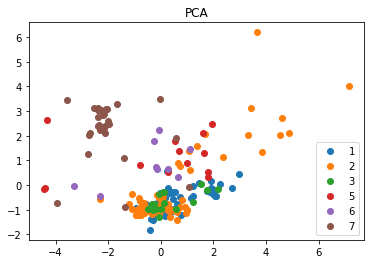

In [26]:
for i in (list(set(y))):
    x_i = y_pred[y == i]
    plt.scatter(x_i[:,0], x_i[:,1], label = i)
plt.title("PCA")    
plt.legend()
plt.show()

In [27]:
from sklearn.manifold import MDS

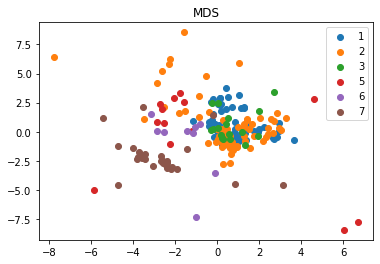

In [28]:
mds = MDS(n_components=2)
y_pred = mds.fit_transform(X_std)
for i in (list(set(y))):
    x_i = y_pred[y == i]
    plt.scatter(x_i[:,0], x_i[:,1], label = i)
plt.title("MDS")
plt.legend()

PCAやMDSなどの線形の次元圧縮について見てみると，先ほど局所的に外れ値となっていた，左上の7や真ん中上の5，右下の2などが上の図でも中央付近の密集しているデータから外れて分布していることがわかり，SOMの線形の次元圧縮手法との共通点が見て取れる．


## 参考文献
- 古川徹生　自己組織化マップ入門 Introduction of Self-Organizing Map (http://www.brain.kyutech.ac.jp/~furukawa/data/SOMtext.pdf)
